In [89]:
import pandas as pd
import os
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



import matplotlib.pyplot as plt

In [90]:
os.chdir("C:/Users/user/Desktop/trade_machine")

In [109]:
df = pd.read_csv("BTC_features.csv")

In [110]:
df.columns

Index(['window_start', 'window_end', 'realized_volatility', 'num_trades',
       'highest_return', 'high_low_gap', 'trade_vol', 'volume_power',
       'time_id', 'dv1_realized_volatility',
       ...
       'vol_rankmin_3', 'vol_rankmax_3', 'vol_rankmin_5', 'vol_rankmax_5',
       'vol_rankmin_10', 'vol_rankmax_10', 'vol_rankmin_20', 'vol_rankmax_20',
       'vol_rankmin_40', 'vol_rankmax_40'],
      dtype='object', length=208)

In [111]:
df_dl = df.loc[:, :'trade.tau']

X = df_dl.drop(['time_id', 'window_start', 'window_end', 'dv1_realized_volatility','window_end_150_ticker', 'window_end_300_ticker',
             'window_end_450_ticker', 'window_end_150_orderbook', 'window_end_300_orderbook', 'window_end_450_orderbook'], axis=1)
y = df_dl['dv1_realized_volatility']

numeric_df_dl = df_dl.select_dtypes(include=[np.number])
inf_columns = np.isinf(numeric_df_dl).any()

columns_with_inf = inf_columns[inf_columns].index

for col in columns_with_inf:
    X[col] = X[col].replace([np.inf, -np.inf], np.nan)

X.fillna(X.mean(), inplace=True)

# 정규화
scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False)

In [112]:
eda_df = df_dl.drop(['window_start', 'window_end','window_end_150_ticker', 'window_end_300_ticker',
             'window_end_450_ticker', 'window_end_150_orderbook', 'window_end_300_orderbook', 'window_end_450_orderbook'], axis=1)

In [113]:
eda_df

,realized_volatility,num_trades,highest_return,high_low_gap,trade_vol,volume_power,time_id,dv1_realized_volatility,realized_volatility_150,num_trades_150,...,bidask_spread_1_300,liq_last_1_450,liq_last_2_450,liq_last_5_450,liq_last_10_450,liq_last_15_450,bidask_spread_0_450,bidask_spread_1_450,tvpl,trade.tau
0,0.000148,394,0.000044,0.000886,15.561441,-1.524966,2022-12-16 21:06:00,0.000227,0.000203,93,...,9.439394,0.002481,0.016026,0.016148,0.016421,0.016851,2.000000,10.000000,15451.184377,0.050379
1,0.000139,398,-0.000133,0.000709,14.353722,-1.861048,2022-12-16 21:07:00,0.000251,0.000185,100,...,7.047619,0.000403,0.001842,0.018412,0.018755,0.019107,1.125000,9.125000,3022.282320,0.050125
2,0.000141,373,0.000443,0.000621,9.920508,-2.354037,2022-12-16 21:08:00,0.000243,0.000178,81,...,7.627907,0.002217,0.014875,0.015138,0.015370,0.015873,6.256410,11.948718,3337.071337,0.051778
3,0.000147,349,0.000488,0.000576,8.113106,-1.654265,2022-12-16 21:09:00,0.000237,0.000161,63,...,9.922078,0.003240,0.003331,0.003912,0.007250,0.007431,6.269841,10.238095,12170.888903,0.053529
4,0.000137,357,0.000488,0.000576,8.279821,-1.820731,2022-12-16 21:10:00,0.000237,0.000114,71,...,11.552941,0.000005,0.000751,0.009600,0.009950,0.010418,6.125000,12.343750,3151.641887,0.052926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102331,0.000375,321,0.001799,0.001930,9.318799,3.196892,2023-02-26 04:03:00,0.000292,0.000577,110,...,19.260870,0.000091,0.000103,0.000324,0.000463,0.000641,18.780823,20.780823,81548.738907,0.055815
102332,0.000208,278,0.000981,0.001406,8.145733,5.302090,2023-02-26 04:04:00,0.000301,0.000196,64,...,25.252632,0.000400,0.000457,0.000569,0.000662,0.000814,16.210526,20.000000,58408.600473,0.059976
102333,0.000210,291,0.001406,0.001406,8.372811,5.499446,2023-02-26 04:05:00,0.000346,0.000235,66,...,22.185715,0.000043,0.000184,0.000344,0.000483,0.000575,23.670887,27.329113,25483.148591,0.058621
102334,0.000208,295,0.000784,0.001406,7.366992,4.227406,2023-02-26 04:06:00,0.000363,0.000198,82,...,20.373333,0.000093,0.000144,0.000287,0.000352,0.000536,19.597221,24.000000,63242.922875,0.058222


In [114]:
eda_df['time_id'] = pd.to_datetime(eda_df['time_id'])
eda_df.set_index('time_id', inplace=True)

eda_df.reset_index(inplace=True)



In [117]:
eda_df.to_csv('data/raw_df.csv')

In [118]:
eda_df.columns

Index(['time_id', 'realized_volatility', 'num_trades', 'highest_return',
       'high_low_gap', 'trade_vol', 'volume_power', 'dv1_realized_volatility',
       'realized_volatility_150', 'num_trades_150', 'highest_return_150',
       'high_low_gap_150', 'trade_vol_150', 'volume_power_150',
       'realized_volatility_300', 'num_trades_300', 'highest_return_300',
       'high_low_gap_300', 'trade_vol_300', 'volume_power_300',
       'realized_volatility_450', 'num_trades_450', 'highest_return_450',
       'high_low_gap_450', 'trade_vol_450', 'volume_power_450', 'liq_last_1',
       'liq_last_2', 'liq_last_5', 'liq_last_10', 'liq_last_15',
       'bidask_spread_0', 'bidask_spread_1', 'liq_last_1_150',
       'liq_last_2_150', 'liq_last_5_150', 'liq_last_10_150',
       'liq_last_15_150', 'bidask_spread_0_150', 'bidask_spread_1_150',
       'liq_last_1_300', 'liq_last_2_300', 'liq_last_5_300', 'liq_last_10_300',
       'liq_last_15_300', 'bidask_spread_0_300', 'bidask_spread_1_300',
      

In [106]:
vis_df['dv1_realized_volatility']

0        0.000240
1        0.000221
2        0.000128
3        0.000104
4        0.000153
           ...   
10262    0.000309
10263    0.000456
10264    0.000429
10265    0.000291
10266    0.000293
Name: dv1_realized_volatility, Length: 10267, dtype: float64

In [96]:
vis_df = resampled_df[['time_id','dv1_realized_volatility']]
vis_df['date'] = vis_df['time_id']


C:\Users\user\AppData\Local\Temp\ipykernel_13456\2042059451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_df['date'] = vis_df['time_id']


In [97]:
vis_df.drop(columns=['time_id'],inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_13456\1732605422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_df.drop(columns=['time_id'],inplace=True)


In [98]:
vis_df.set_index('date', inplace=True)
vis_df.reset_index(inplace=True)
vis_df

,date,dv1_realized_volatility
0,2022-12-16 21:00:00,0.000240
1,2022-12-16 21:10:00,0.000221
2,2022-12-16 21:20:00,0.000128
3,2022-12-16 21:30:00,0.000104
4,2022-12-16 21:40:00,0.000153
...,...,...
10262,2023-02-26 03:20:00,0.000309
10263,2023-02-26 03:30:00,0.000456
10264,2023-02-26 03:40:00,0.000429
10265,2023-02-26 03:50:00,0.000291


In [99]:
vis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10267 entries, 0 to 10266
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     10267 non-null  datetime64[ns]
 1   dv1_realized_volatility  10247 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 160.5 KB


In [100]:
vis_df.to_csv('vis_df.csv')

In [103]:
import torch
import torch.nn as nn
import numpy as np
import time
import math
from matplotlib import pyplot

torch.manual_seed(0)
np.random.seed(0)

# S is the source sequence length
# T is the target sequence length
# N is the batch size
# E is the feature number

#src = torch.rand((10, 32, 512)) # (S,N,E) 
#tgt = torch.rand((20, 32, 512)) # (T,N,E)
#out = transformer_model(src, tgt)

input_window = 100 # number of input steps
output_window = 1 # number of prediction steps, in this model its fixed to one
block_len = input_window + output_window # for one input-output pair
batch_size = 10
train_size = 0.8
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()       
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        # div_term = torch.exp(
        #     torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model)
        # )
        div_term = 1 / (10000 ** ((2 * np.arange(d_model)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term[0::2])
        pe[:, 1::2] = torch.cos(position * div_term[1::2])

        pe = pe.unsqueeze(0).transpose(0, 1) # [5000, 1, d_model],so need seq-len <= 5000
        #pe.requires_grad = False
        self.register_buffer('pe', pe)

    def forward(self, x):
        # print(self.pe[:x.size(0), :].repeat(1,x.shape[1],1).shape ,'---',x.shape)
        # dimension 1 maybe inequal batchsize
        return x + self.pe[:x.size(0), :].repeat(1,x.shape[1],1)
          

class TransAm(nn.Module):
    def __init__(self,feature_size=250,num_layers=1,dropout=0.1):
        super(TransAm, self).__init__()
        self.model_type = 'Transformer'
        self.input_embedding  = nn.Linear(1,feature_size)
        self.src_mask = None

        self.pos_encoder = PositionalEncoding(feature_size)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=10, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size,1)
        self.init_weights()

    def init_weights(self):
        initrange = 0.1    
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self,src):
        # src with shape (input_window, batch_len, 1)
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            device = src.device
            mask = self._generate_square_subsequent_mask(len(src)).to(device)
            self.src_mask = mask

        src = self.input_embedding(src) # linear transformation before positional embedding
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src,self.src_mask)#, self.src_mask)
        output = self.decoder(output)
        return output

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

# if window is 100 and prediction step is 1
# in -> [0..99]
# target -> [1..100]
'''
In fact, assuming that the number of samples is N, 
the length of the input sequence is m, and the backward prediction is k steps, 
then length of a block [input : 1 , 2 ... m  -> output : k , k+1....m+k ] 
should be (m+k) :  block_len, so to ensure that each block is complete, 
the end element of the last block should be the end element of the entire sequence, 
so the actual number of blocks is [N - block_len + 1] 
'''
def create_inout_sequences(input_data, input_window ,output_window):
    inout_seq = []
    L = len(input_data)
    block_num =  L - block_len + 1
    # total of [N - block_len + 1] blocks
    # where block_len = input_window + output_window

    for i in range( block_num ):
        train_seq = input_data[i : i + input_window]
        train_label = input_data[i + output_window : i + input_window + output_window]
        inout_seq.append((train_seq ,train_label))

    return torch.FloatTensor(np.array(inout_seq))

def get_data():
    # construct a littel toy dataset
    time        = np.arange(0, 400, 0.1)    
    amplitude   = np.sin(time) + np.sin(time * 0.05) + \
                  np.sin(time * 0.12) * np.random.normal(-0.2, 0.2, len(time))

    from sklearn.preprocessing import MinMaxScaler
    
    #loading weather data from a file
    from pandas import read_csv
    series = read_csv('vis_df.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
    #series = vis_df.copy()
    # looks like normalizing input values curtial for the model
    scaler = MinMaxScaler(feature_range=(-1, 1)) 
    #amplitude = scaler.fit_transform(series.to_numpy().reshape(-1, 1)).reshape(-1)
    amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)

    sampels = int(len(time) * train_size) # use a parameter to control training size
    train_data = amplitude[:sampels]
    test_data = amplitude[sampels:]

    # convert our train data into a pytorch train tensor
    #train_tensor = torch.FloatTensor(train_data).view(-1)

    train_sequence = create_inout_sequences( train_data,input_window ,output_window)
    '''
    train_sequence = train_sequence[:-output_window] # todo: fix hack? -> din't think this through, looks like the last n sequences are to short, so I just remove them. Hackety Hack..
    # looks like maybe solved
    '''
    #test_data = torch.FloatTensor(test_data).view(-1) 
    test_data = create_inout_sequences(test_data,input_window,output_window)
    '''
    test_data = test_data[:-output_window] # todo: fix hack?
    '''
    # shape with (block , sql_len , 2 )
    return train_sequence.to(device),test_data.to(device)


def get_batch(input_data, i , batch_size):

    # batch_len = min(batch_size, len(input_data) - 1 - i) #  # Now len-1 is not necessary
    batch_len = min(batch_size, len(input_data) - i)
    data = input_data[ i:i + batch_len ]
    input = torch.stack([item[0] for item in data]).view((input_window,batch_len,1))
    # ( seq_len, batch, 1 ) , 1 is feature size
    target = torch.stack([item[1] for item in data]).view((input_window,batch_len,1))
    return input, target

def train(train_data):
    model.train() # Turn on the train mode \o/
    total_loss = 0.
    start_time = time.time()

    for batch, i in enumerate(range(0, len(train_data), batch_size)):  # Now len-1 is not necessary
        # data and target are the same shape with (input_window,batch_len,1)
        data, targets = get_batch(train_data, i , batch_size)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.7)
        optimizer.step()

        total_loss += loss.item()
        log_interval = int(len(train_data) / batch_size / 5)
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.6f} | {:5.2f} ms | '
                  'loss {:5.5f} | ppl {:8.2f}'.format(
                    epoch, batch, len(train_data) // batch_size, scheduler.get_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()

def plot_and_loss(eval_model, data_source,epoch):
    eval_model.eval() 
    total_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)
    with torch.no_grad():
        # for i in range(0, len(data_source) - 1):
        for i in range(len(data_source)):  # Now len-1 is not necessary
            data, target = get_batch(data_source, i , 1) # one-step forecast
            output = eval_model(data)            
            total_loss += criterion(output, target).item()
            test_result = torch.cat((test_result, output[-1].view(-1).cpu()), 0)
            truth = torch.cat((truth, target[-1].view(-1).cpu()), 0)
            
    #test_result = test_result.cpu().numpy() -> no need to detach stuff.. 
    len(test_result)

    pyplot.plot(test_result,color="red")
    pyplot.plot(truth[:500],color="blue")
    pyplot.plot(test_result-truth,color="green")
    pyplot.grid(True, which='both')
    pyplot.axhline(y=0, color='k')
    pyplot.savefig('graph/transformer-epoch%d.png'%epoch)
    pyplot.close()
    return total_loss / i


# predict the next n steps based on the input data 
def predict_future(eval_model, data_source,steps):
    eval_model.eval() 
    total_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)
    data, _ = get_batch(data_source , 0 , 1)
    with torch.no_grad():
        for i in range(0, steps):            
            output = eval_model(data[-input_window:])
            # (seq-len , batch-size , features-num)
            # input : [ m,m+1,...,m+n ] -> [m+1,...,m+n+1]
            data = torch.cat((data, output[-1:])) # [m,m+1,..., m+n+1]

    data = data.cpu().view(-1)
    
    # I used this plot to visualize if the model pics up any long therm structure within the data.
    pyplot.plot(data,color="red")       
    pyplot.plot(data[:input_window],color="blue")    
    pyplot.grid(True, which='both')
    pyplot.axhline(y=0, color='k')
    pyplot.savefig('graph/transformer-future%d.png'%steps)
    pyplot.show()
    pyplot.close()
        

def evaluate(eval_model, data_source):
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    eval_batch_size = 1000
    with torch.no_grad():
        # for i in range(0, len(data_source) - 1, eval_batch_size): # Now len-1 is not necessary
        for i in range(0, len(data_source), eval_batch_size):
            data, targets = get_batch(data_source, i,eval_batch_size)
            output = eval_model(data)            
            total_loss += len(data[0]) * criterion(output, targets).cpu().item()
    return total_loss / len(data_source)



C:\Users\user\AppData\Local\Temp\ipykernel_13456\2221736003.py:121: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('vis_df.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
c:\Users\user\anaconda3\envs\trade\lib\site-packages\torch\optim\lr_scheduler.py:381: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


| epoch   1 |    62/  310 batches | lr 0.005000 | 203.93 ms | loss 5.27636 | ppl   195.66
| epoch   1 |   124/  310 batches | lr 0.005000 | 185.29 ms | loss 0.10354 | ppl     1.11
| epoch   1 |   186/  310 batches | lr 0.005000 | 185.38 ms | loss 0.10333 | ppl     1.11
| epoch   1 |   248/  310 batches | lr 0.005000 | 187.07 ms | loss 0.09875 | ppl     1.10
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 60.92s | valid loss 0.16733 | valid ppl     1.18
-----------------------------------------------------------------------------------------
| epoch   2 |    62/  310 batches | lr 0.004513 | 189.97 ms | loss 0.09375 | ppl     1.10
| epoch   2 |   124/  310 batches | lr 0.004513 | 193.13 ms | loss 0.08875 | ppl     1.09
| epoch   2 |   186/  310 batches | lr 0.004513 | 188.59 ms | loss 0.08880 | ppl     1.09
| epoch   2 |   248/  310 batches | lr 0.004513 | 186.51 ms | loss 0.09232 | ppl     1.10
------------------------

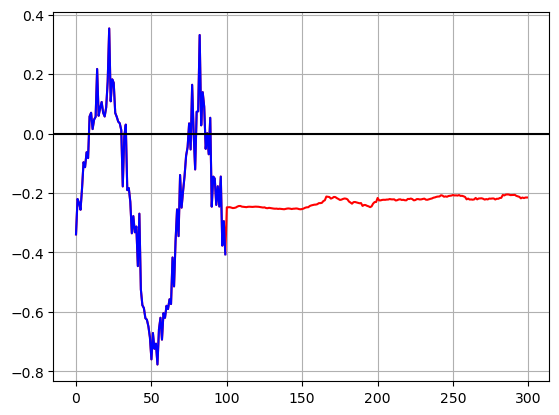

-----------------------------------------------------------------------------------------
| end of epoch   5 | time: 64.31s | valid loss 0.05411 | valid ppl     1.06
-----------------------------------------------------------------------------------------
| epoch   6 |    62/  310 batches | lr 0.003675 | 191.80 ms | loss 0.01621 | ppl     1.02
| epoch   6 |   124/  310 batches | lr 0.003675 | 192.53 ms | loss 0.01524 | ppl     1.02
| epoch   6 |   186/  310 batches | lr 0.003675 | 190.07 ms | loss 0.01550 | ppl     1.02
| epoch   6 |   248/  310 batches | lr 0.003675 | 189.61 ms | loss 0.01907 | ppl     1.02
-----------------------------------------------------------------------------------------
| end of epoch   6 | time: 61.42s | valid loss 0.05051 | valid ppl     1.05
-----------------------------------------------------------------------------------------
| epoch   7 |    62/  310 batches | lr 0.003492 | 193.16 ms | loss 0.01572 | ppl     1.02
| epoch   7 |   124/  310 batches | lr

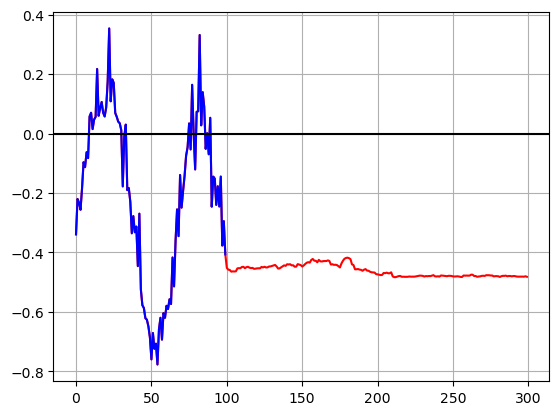

-----------------------------------------------------------------------------------------
| end of epoch  10 | time: 67.71s | valid loss 0.03666 | valid ppl     1.04
-----------------------------------------------------------------------------------------
tensor([[[ 4.8547e-01],
         [ 7.0990e-01],
         [ 9.3850e-02],
         [ 7.2000e-01],
         [ 6.0203e-01],
         [ 6.8961e-01],
         [ 6.6803e-01],
         [ 2.4846e-01],
         [ 5.9474e-01],
         [ 7.2631e-01]],

        [[ 6.6069e-01],
         [ 7.2010e-01],
         [-8.0616e-02],
         [ 7.6984e-01],
         [ 4.0915e-01],
         [ 7.5075e-01],
         [ 4.6795e-01],
         [ 4.0576e-01],
         [ 6.5941e-01],
         [ 5.7912e-01]],

        [[-3.3790e-03],
         [ 7.3933e-01],
         [ 7.9690e-01],
         [ 7.6981e-01],
         [ 8.0325e-01],
         [ 7.7327e-01],
         [ 5.3674e-01],
         [ 6.3331e-01],
         [ 7.9598e-01],
         [ 2.7150e-02]],

        [[ 8.0841e

In [105]:
train_data, val_data = get_data()
model = TransAm().to(device)

criterion = nn.MSELoss()
lr = 0.005 
#optimizer = torch.optim.SGD(model.parameters(), lr=lr)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.95)

best_val_loss = float("inf")
epochs = 10 # The number of epochs
best_model = None

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(train_data)
    if ( epoch % 5 == 0 ):
        val_loss = plot_and_loss(model, val_data,epoch)
        predict_future(model, val_data,200)
    else:
        val_loss = evaluate(model, val_data)
   
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.5f} | valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    #if val_loss < best_val_loss:
    #    best_val_loss = val_loss
    #    best_model = model

    scheduler.step() 

src = torch.rand(input_window, batch_size, 1) # (source sequence length,batch size,feature number) 
out = model(src)
#
print(out)
print(out.shape)

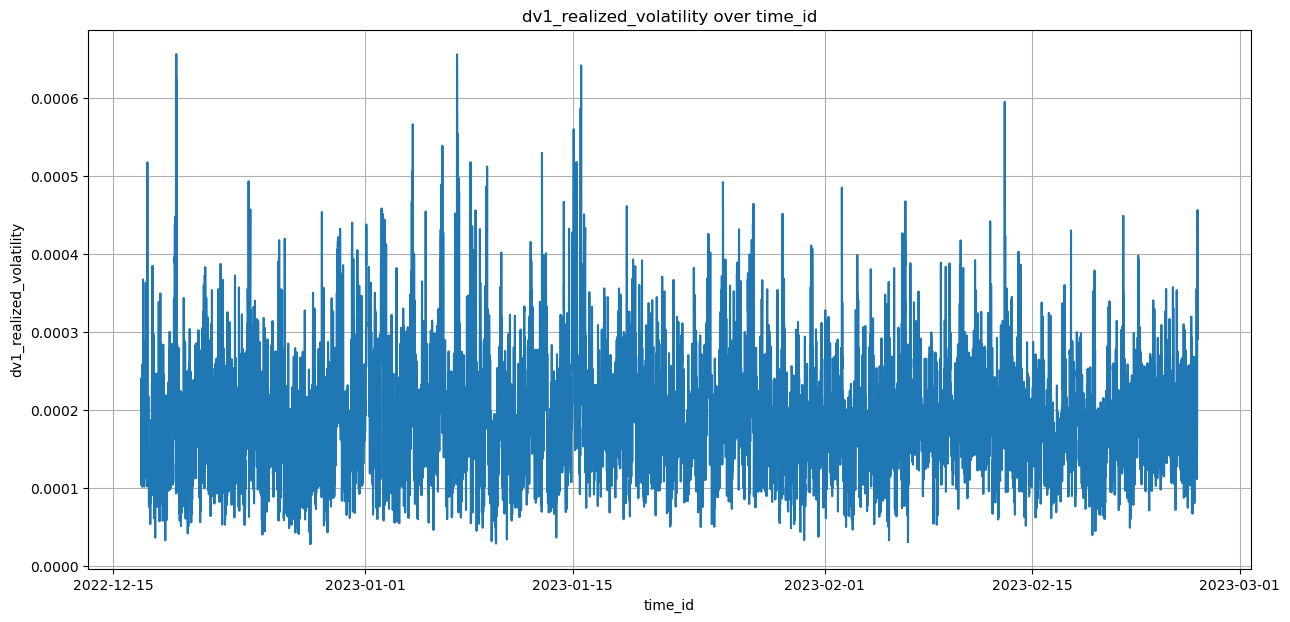

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe



plt.figure(figsize=(15,7))  # setting the size of the plot
plt.plot(vis_df['time_id'], vis_df['dv1_realized_volatility'])

plt.title('dv1_realized_volatility over time_id')
plt.xlabel('time_id')
plt.ylabel('dv1_realized_volatility')
plt.grid(True)
plt.show()


In [39]:
import numpy as np
import pandas as pd

def date_time_info(df: pd.DataFrame) -> pd.DataFrame:
    df['time_id'] = pd.to_datetime(df['time_id'])
    df['date'] = df['time_id'].dt.date
    df['month'] = df['time_id'].dt.month
    df['day'] = df['time_id'].dt.day
    df['hour'] = df['time_id'].dt.hour
    df['weekday'] = df['time_id'].dt.weekday

    
    # sin/cos 변환
    df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['sin_day'] = np.sin(2 * np.pi * df['day'] / 30)  # 30일을 기준으로 함 (대략적으로)
    df['cos_day'] = np.cos(2 * np.pi * df['day'] / 30)
    df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
    df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)
    df['sin_weekday'] = np.sin(2 * np.pi * df['weekday'] / 7)
    df['cos_weekday'] = np.cos(2 * np.pi * df['weekday'] / 7)

    return df

eda_df = date_time_info(eda_df)

